In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("cleaned_data/gurgaon_properties_missing_value_imputation.csv")

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena laxmi apartments,sector 99a,0.30,5425.0,2.0,1.0,2,5.0,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
1,house,independent,sector 48,5.50,23504.0,4.0,4.0,2,2.0,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0
2,flat,green court,sector 90,0.47,6812.0,2.0,2.0,1,0.0,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,signature global city 92,sector 92,0.78,11143.0,2.0,2.0,3,2.0,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
4,flat,tulip lemon,sector 69,0.62,12863.0,2.0,2.0,1,4.0,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0


In [5]:
df.shape

(3688, 18)

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 99a,0.30,2.0,1.0,2,5.0,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0
1,house,sector 48,5.50,4.0,4.0,2,2.0,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0
2,flat,sector 90,0.47,2.0,2.0,1,0.0,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,0.78,2.0,2.0,3,2.0,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
4,flat,sector 69,0.62,2.0,2.0,1,4.0,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0


### luxury score

<Axes: >

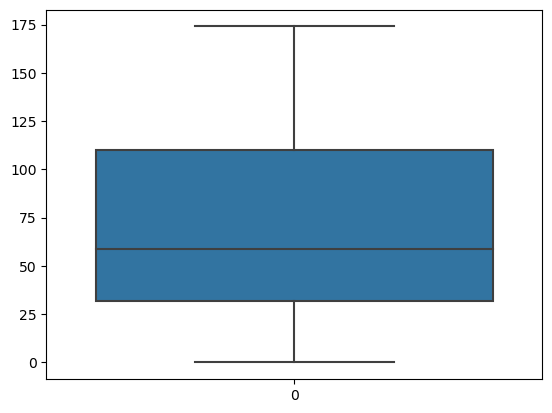

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 99a,0.30,2.0,1.0,2,5.0,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,Medium
1,house,sector 48,5.50,4.0,4.0,2,2.0,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,Low
2,flat,sector 90,0.47,2.0,2.0,1,0.0,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,0.78,2.0,2.0,3,2.0,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,Low
4,flat,sector 69,0.62,2.0,2.0,1,4.0,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0,Medium


### floorNum

<Axes: >

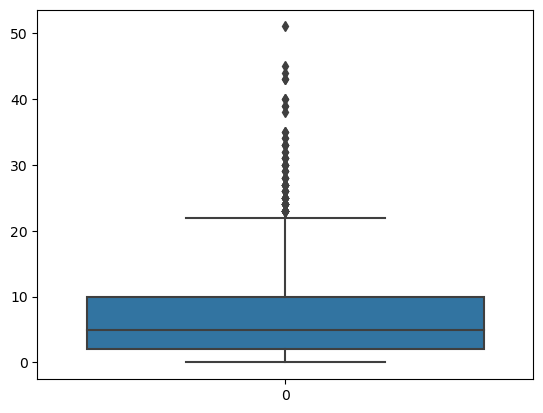

In [13]:
sns.boxplot(df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 99a,0.30,2.0,1.0,2,5.0,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,Medium,Mid Floor
1,house,sector 48,5.50,4.0,4.0,2,2.0,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,Low,Low Floor
2,flat,sector 90,0.47,2.0,2.0,1,0.0,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,Low Floor
3,flat,sector 92,0.78,2.0,2.0,3,2.0,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,Low,Low Floor
4,flat,sector 69,0.62,2.0,2.0,1,4.0,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,108.0,Medium,Mid Floor


In [17]:
train_df.drop(columns=['luxury_score','floorNum'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 99a,0.30,2.0,1.0,2,New Property,511.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Floor
1,house,sector 48,5.50,4.0,4.0,2,Relatively New,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,Low,Low Floor
2,flat,sector 90,0.47,2.0,2.0,1,New Property,767.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
3,flat,sector 92,0.78,2.0,2.0,3,Under Construction,846.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
4,flat,sector 69,0.62,2.0,2.0,1,Relatively New,536.0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Mid Floor


In [28]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to the categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    
    # Extract the column and reshape it to a 2D array
    col_data = data_label_encoded[col].values.reshape(-1, 1)
    
    # Apply label encoding
    data_label_encoded[col] = oe.fit_transform(col_data)
    
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price',axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway gurgaon', 'gwal pahari', 'manesar',
       'mehrauli gurgaon road', 'new gurgaon', 'new sector 2', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 1a',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 24',
       'sector 25', 'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5

In [29]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,113.0,2.0,1.0,2.0,1.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1,1.0,58.0,4.0,4.0,2.0,3.0,2340.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,107.0,2.0,2.0,1.0,1.0,767.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,109.0,2.0,2.0,3.0,4.0,846.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,82.0,2.0,2.0,1.0,3.0,536.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,0.0,112.0,2.0,2.0,4.0,4.0,1235.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3684,0.0,7.0,2.0,2.0,2.0,3.0,1100.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3685,0.0,61.0,3.0,3.0,4.0,0.0,2491.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3686,0.0,109.0,3.0,4.0,3.0,0.0,1778.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [30]:
y_label

0        0.30
1        5.50
2        0.47
3        0.78
4        0.62
        ...  
3683     0.92
3684     1.24
3685     2.65
3686     0.75
3687    12.50
Name: price, Length: 3688, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

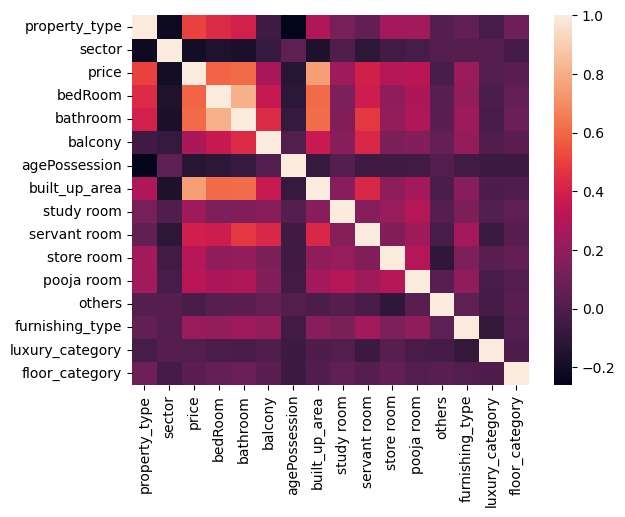

In [32]:
sns.heatmap(data_label_encoded.corr())

In [39]:
df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
df1

,feature,corr_coeff
0,sector,-0.198226
1,price,1.000000
2,bedRoom,0.591070
3,bathroom,0.609621
4,balcony,0.270781
5,agePossession,-0.132573
6,built_up_area,0.750087
7,study room,0.239377
8,servant room,0.391031
9,store room,0.302684


### Technique 2 - Random Forest Feature Importance

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

# Extraxt feature importance scores for label encoded data
df2 = pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf.feature_importances_
}).sort_values(by='rf_importance',ascending=False)
df2

,feature,rf_importance
6,built_up_area,0.650211
0,property_type,0.105284
1,sector,0.102438
3,bathroom,0.024282
2,bedRoom,0.023102
8,servant room,0.019431
5,agePossession,0.013814
4,balcony,0.012203
12,furnishing_type,0.010388
7,study room,0.007683


### Technique 3 - Gradient Boosting Feature importances

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb = GradientBoostingRegressor()
gb.fit(X_label,y_label)

# Extract feature importance scores for label encoded data
df3 = pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

In [44]:
df3

,feature,gb_importance
6,built_up_area,0.683766
1,sector,0.103110
0,property_type,0.101492
2,bedRoom,0.035056
3,bathroom,0.032751
8,servant room,0.023395
9,store room,0.005925
12,furnishing_type,0.003973
5,agePossession,0.003879
7,study room,0.003723


### Technique 4 - Permutation Importance

In [46]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label,X_test_label,y_train_label,y_test_label = train_test_split(X_label,y_label,test_size=0.2,random_state=42)

# Train a Random Forest reegressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_train_label,y_train_label)

# calculate Permutation Importance
perm_importance = permutation_importance(rf_label,X_test_label,y_test_label,n_repeats=30,random_state=42)

# Organize results into a DataFrame
df4 = pd.DataFrame({
    'feature':X_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending=False)

In [47]:
df4

,feature,permutation_importance
6,built_up_area,0.699417
0,property_type,0.208626
1,sector,0.136879
8,servant room,0.017410
3,bathroom,0.006938
4,balcony,0.006722
7,study room,0.004797
9,store room,0.003969
14,floor_category,0.003791
5,agePossession,0.003019


### Technique 5 - LASSO

In [49]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regresssion model
lasso = Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y_label)

# Extract coefficients
df5 = pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)
df5

,feature,lasso_coeff
6,built_up_area,1.511163
0,property_type,0.711427
3,bathroom,0.272007
9,store room,0.194839
7,study room,0.164603
12,furnishing_type,0.158639
8,servant room,0.148994
10,pooja room,0.072694
13,luxury_category,0.051774
2,bedRoom,0.006583


### Technique 6 - RFE(Recursive Feature Elimination)

In [50]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Applt RFE on the label-encoded and standardized training data
selector_label = RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
selector_label = selector_label.fit(X_label,y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
df6 = pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

In [51]:
df6

,feature,rfe_score
6,built_up_area,0.650536
1,sector,0.106710
0,property_type,0.102607
2,bedRoom,0.024041
3,bathroom,0.023750
8,servant room,0.019857
5,agePossession,0.013132
4,balcony,0.012294
12,furnishing_type,0.009345
7,study room,0.008814


### Technique 7 - Linear Regression Weights

In [55]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label encoded and standardized training data
linear_reg = LinearRegression()
linear_reg.fit(X_scaled,y_label)

# Extract coefficients
df7 = pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs':linear_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

In [56]:
df7

,feature,reg_coeffs
6,built_up_area,1.513789
0,property_type,0.711732
3,bathroom,0.278460
9,store room,0.199295
7,study room,0.172617
12,furnishing_type,0.167803
8,servant room,0.158387
10,pooja room,0.075674
13,luxury_category,0.063372
2,bedRoom,0.009306


### Technique 8 - SHAP

In [58]:
!pip install shap

   ---------------------------------------- 0.0/450.3 kB ? eta -:--:--
   -------------------- ------------------- 235.5/450.3 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 450.3/450.3 kB 5.6 MB/s eta 0:00:00


In [59]:
import shap

# Compute SHAP values using the trained Random FOrest model
rf =  RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.88024104e-01, -3.78268488e-01, -4.05991214e-02, ...,
        -9.74057950e-03,  3.47961557e-03, -6.13709386e-03],
       [ 1.70514390e+00,  3.39284700e-01,  2.48997362e-02, ...,
         3.14316861e-02, -3.87742276e-02, -3.57706142e-02],
       [-1.84136576e-01, -3.00300969e-01, -6.29488920e-02, ...,
        -1.02739849e-02, -6.41421135e-03, -6.63598758e-03],
       ...,
       [-5.21529117e-01,  4.47098957e-01, -2.78478909e-02, ...,
        -5.25956514e-02,  5.44066753e-04, -8.07141603e-02],
       [-2.98555028e-01, -7.09666191e-01, -2.33912648e-02, ...,
        -2.22108597e-02, -3.32927565e-04, -1.26281861e-02],
       [ 2.00672207e+00,  1.07479296e+00,  2.05521758e-01, ...,
         6.48214180e-02,  1.33017487e-02, -6.25562657e-03]])

In [60]:
df8 = pd.DataFrame({
    'feature':X_label.columns,
    'SHAP_score':np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score',ascending=False)

In [61]:
df8

,feature,SHAP_score
6,built_up_area,1.233767
0,property_type,0.474169
1,sector,0.378488
3,bathroom,0.104668
8,servant room,0.089440
2,bedRoom,0.053611
4,balcony,0.041238
12,furnishing_type,0.028086
5,agePossession,0.026821
14,floor_category,0.026221


In [62]:
final_df = df1.merge(df2,on='feature').merge(df3,on='feature').merge(df4,on='feature').merge(df5,on='feature').merge(df6,on='feature').merge(df7,on='feature').merge(df8,on='feature').set_index('feature')

In [63]:
final_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.198226,0.102438,0.103110,0.136879,-0.060899,0.106710,-0.070016,0.378488
bedRoom,0.591070,0.023102,0.035056,0.001207,0.006583,0.024041,0.009306,0.053611
bathroom,0.609621,0.024282,0.032751,0.006938,0.272007,0.023750,0.278460,0.104668
balcony,0.270781,0.012203,0.001485,0.006722,-0.038147,0.012294,-0.060994,0.041238
agePossession,-0.132573,0.013814,0.003879,0.003019,-0.000000,0.013132,0.001673,0.026821
built_up_area,0.750087,0.650211,0.683766,0.699417,1.511163,0.650536,1.513789,1.233767
study room,0.239377,0.007683,0.003723,0.004797,0.164603,0.008814,0.172617,0.016442
servant room,0.391031,0.019431,0.023395,0.017410,0.148994,0.019857,0.158387,0.089440
store room,0.302684,0.007675,0.005925,0.003969,0.194839,0.007399,0.199295,0.017037


In [65]:
final_df = final_df.divide(final_df.sum(axis=0),axis=1)

In [67]:
final_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.721251
sector             0.137544
bathroom           0.029790
servant room       0.026642
bedRoom            0.023827
balcony            0.011342
agePossession      0.010178
store room         0.007244
study room         0.007200
furnishing_type    0.006595
floor_category     0.006265
luxury_category    0.005467
pooja room         0.004311
others             0.002343
dtype: float64

In [68]:
# with all cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)

scores = cross_val_score(rf,X_label,y_label,cv=5,scoring='r2')

In [69]:
scores.mean()

0.8145376000723429

In [70]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [71]:
scores.mean()

0.8172518286278674

In [ ]:
export_df = X_label.drop(columns=['pooja room','study room', 'others'])
export